In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -o -q "/content/drive/MyDrive/genererimage.zip" -d "/content/"




In [ ]:
import os

base_dir = "/content/gernererimage/datasets"

if os.path.exists(base_dir):
    print("Contenu de datasets :", os.listdir(base_dir))
else:
    print(" Le dossier datasets n'existe pas")


Contenu de datasets : ['food', 'real_estate', 'fashion']


In [ ]:
import os
from PIL import Image

# --- dossiers à traiter ---
folders = [
    "/content/gernererimage/datasets/fashion",
    "/content/gernererimage/datasets/food",
    "/content/gernererimage/datasets/real_estate"
]

# --- extensions acceptées ---
valid_ext = [".jpg", ".jpeg", ".png", ".webp", ".avif", ".jfif", ".heic"]

def convert_and_resize(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        img = img.resize((224, 224), Image.LANCZOS)

        # nouveau nom : même nom, extension .jpg
        new_path = os.path.splitext(image_path)[0] + ".jpg"
        img.save(new_path, "JPEG", quality=95)

        # supprimer seulement si ancien nom ≠ nouveau nom
        if new_path != image_path:
            os.remove(image_path)

        print(f"[OK] Converti : {new_path}")

    except Exception as e:
        print(f"[ERREUR] {image_path} → {e}")


# --- traitement des dossiers ---
for folder in folders:
    print("\n--- Traitement du dossier:", folder, "---")

    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)

        # ignorer les dossiers
        if os.path.isdir(filepath):
            continue

        ext = os.path.splitext(filename)[1].lower()

        if ext in valid_ext:
            convert_and_resize(filepath)
        else:
            print(f"[IGNORÉ] {filename} (format non image)")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[OK] Converti : /content/gernererimage/datasets/fashion/28607.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/2335.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/2547.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/1283_1_aug.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/36749.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/54144.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/1217_1_aug.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/3414.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/3008_1_aug.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/255_2_aug.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/30258.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/4019_2_aug.jpg
[OK] Converti : /content/gernererimage/datasets/fashion/115_prouds.jpg
[OK] Converti : /content/gernererimage

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[OK] Converti : /content/gernererimage/datasets/real_estate/tropical_846.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/shabby-chic-style_250.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/modern_169.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/mid-century-modern_874.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/victorian_64.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/eclectic_217.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/craftsman_720.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/coastal_377.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/traditional_418.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/transitional_271.jpg
[OK] Converti : /content/gernererimage/datasets/real_estate/farmhouse_224.jpg
[OK] Converti : /content/gernererimage/datasets/re

In [ ]:
import os

base_dir = "/content/gernererimage/datasets"
splits = ["train", "val", "test"]
classes = ["fashion", "food", "real_estate"]

print("🔍 Vérification de la structure :\n")

for split in splits:
    split_path = os.path.join(base_dir, split)
    if not os.path.exists(split_path):
        print(f"❌ Dossier manquant : {split_path}")
        continue

    print(f"✅ Dossier existant : {split_path}")

    for cls in classes:
        class_path = os.path.join(split_path, cls)
        if os.path.exists(class_path):
            print(f"    ✅ {cls} → {len(os.listdir(class_path))} fichiers")
        else:
            print(f"    ❌ {cls} manquant")

print("\n🔍 Vérification terminée !")


🔍 Vérification de la structure :

❌ Dossier manquant : /content/gernererimage/datasets/train
❌ Dossier manquant : /content/gernererimage/datasets/val
❌ Dossier manquant : /content/gernererimage/datasets/test

🔍 Vérification terminée !


In [ ]:
# Librairies principales
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
import os
import matplotlib.pyplot as plt


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = "/content/gernererimage/datasets"
output_dir = "/content/gernererimage/splitted_dataset"

classes = ["fashion", "food", "real_estate"]

# Crée structure train/val/test
for split in ["train", "val", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

for cls in classes:
    img_dir = os.path.join(base_dir, cls)
    images = os.listdir(img_dir)

    train, test = train_test_split(images, test_size=0.1, random_state=42)
    train, val = train_test_split(train, test_size=0.2, random_state=42)

    for img in train:
        shutil.copy(os.path.join(img_dir, img), os.path.join(output_dir, "train", cls))

    for img in val:
        shutil.copy(os.path.join(img_dir, img), os.path.join(output_dir, "val", cls))

    for img in test:
        shutil.copy(os.path.join(img_dir, img), os.path.join(output_dir, "test", cls))

print("Dataset organisé avec succès ✔️")


Dataset organisé avec succès ✔️


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Chemin vers le dossier principal contenant fashion/food/real_estate
data_dir = "/content/gernererimage/splitted_dataset"

# Vérifier que le dossier existe
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Le dossier {data_dir} n'existe pas. Vérifie le chemin !")

# Transformations pour ViT : resize, tensor, normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),          # ViT attend 224x224
    transforms.ToTensor(),                  # convertir en Tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # normalisation simple
])

# Création des datasets PyTorch
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Vérification
print("✅ Classes :", train_dataset.classes)
print("📊 Nombre d'images training :", len(train_dataset))
print("📊 Nombre d'images validation :", len(val_dataset))
print("📊 Nombre d'images test :", len(test_dataset))


✅ Classes : ['fashion', 'food', 'real_estate']
📊 Nombre d'images training : 38998
📊 Nombre d'images validation : 9751
📊 Nombre d'images test : 5418


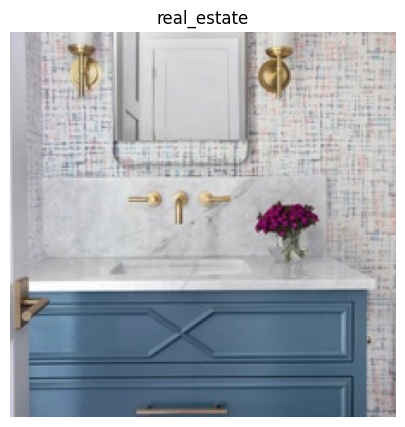

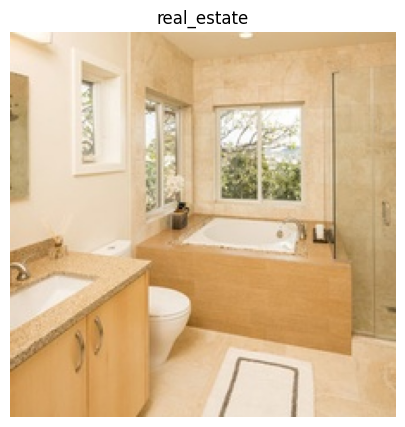

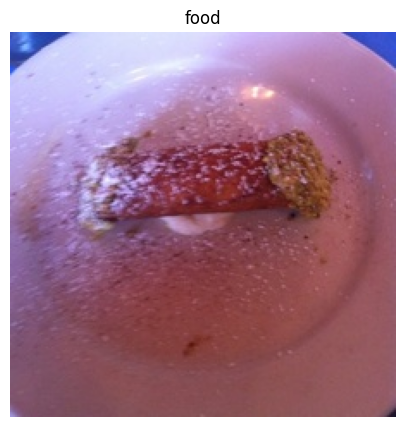

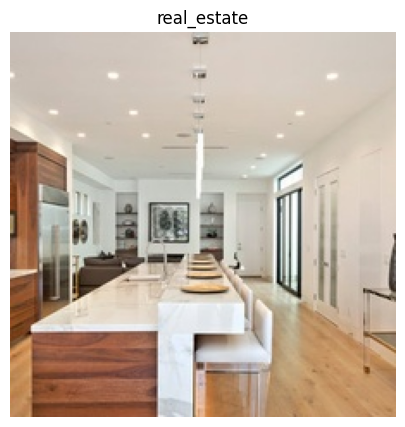

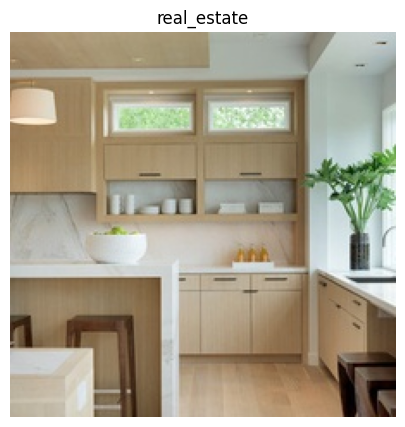

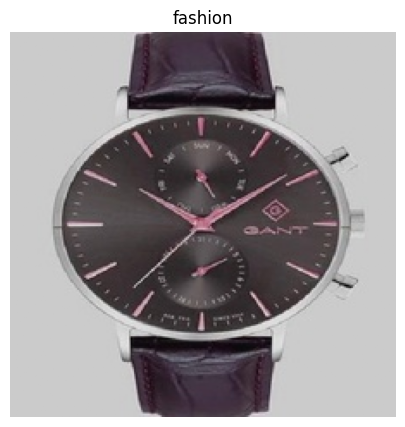

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour afficher un batch d'images
def imshow(img, title):
    img = img / 2 + 0.5  # dénormaliser
    npimg = img.numpy()
    plt.figure(figsize=(10,5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Prendre un batch d'images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Afficher les 6 premières images avec leurs classes
for i in range(6):
    imshow(images[i], train_dataset.classes[labels[i]])


In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device utilisé :", device)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')


num_classes = len(train_dataset.classes)
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes
)

model.to(device)
print(model)


Device utilisé : cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [ ]:
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

# Hyperparamètres
epochs = 5
learning_rate = 5e-5

# Optimiseur
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Fonction de perte
criterion = CrossEntropyLoss()

# Fonction pour calculer l'accuracy
def accuracy(preds, labels):
    _, pred_labels = torch.max(preds, dim=1)
    return (pred_labels == labels).float().mean()


In [ ]:
# Pour suivre la perte et l'accuracy
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

best_val_acc = 0


In [ ]:
# Mode entraînement
model.train()

# Boucle sur un batch (juste pour tester, pas encore full epoch)
for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()              # reset des gradients
    outputs = model(images).logits     # passer les images dans ViT
    loss = criterion(outputs, labels)  # calcul de la perte
    loss.backward()                    # backpropagation
    optimizer.step()                   # mise à jour des poids

    acc = accuracy(outputs, labels)
    print(f"Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}")

    break  # juste le premier batch pour tester


Loss: 1.1469, Accuracy: 0.1562


In [ ]:
# Mode évaluation
model.eval()

# Désactiver le calcul des gradients pour la validation
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        loss = criterion(outputs, labels)
        acc = accuracy(outputs, labels)

        print(f"[Validation] Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}")

        break  # juste le premier batch pour tester


[Validation] Loss: 1.0961, Accuracy: 0.4688


In [ ]:
!pip install safetensors


In [ ]:
from safetensors.torch import save_file

# ===============================
# CONFIG
# ===============================
num_epochs = 5
best_val_acc = 0.0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# ===============================
# TRAINING LOOP
# ===============================
for epoch in range(num_epochs):
    print(f"\n=== Époque {epoch+1}/{num_epochs} ===")

    # ---------- TRAIN ----------
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images).logits
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        acc = accuracy(outputs, labels)

        running_loss += loss.item()
        running_acc += acc.item()

    train_loss = running_loss / len(train_loader)
    train_acc = running_acc / len(train_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"[Train] Loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")

    # ---------- VALIDATION ----------
    model.eval()
    val_running_loss = 0.0
    val_running_acc = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images).logits
            loss = criterion(outputs, labels)
            acc = accuracy(outputs, labels)

            val_running_loss += loss.item()
            val_running_acc += acc.item()

    val_loss = val_running_loss / len(val_loader)
    val_acc = val_running_acc / len(val_loader)

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"[Validation] Loss: {val_loss:.4f} | Accuracy: {val_acc:.4f}")

    # ---------- SAVE BEST MODEL ----------
    if val_acc > best_val_acc:
        best_val_acc = val_acc

        save_file(
            model.state_dict(),
            "best_vit_model.safetensors"
        )

        print("✅ Meilleur modèle sauvegardé (safetensors)")



=== Époque 1/5 ===
[Train] Loss: 0.0145 | Accuracy: 0.9985
[Validation] Loss: 0.0067 | Accuracy: 0.9985
✅ Meilleur modèle sauvegardé (safetensors)

=== Époque 2/5 ===
[Train] Loss: 0.0046 | Accuracy: 0.9991
[Validation] Loss: 0.0033 | Accuracy: 0.9991
✅ Meilleur modèle sauvegardé (safetensors)

=== Époque 3/5 ===
[Train] Loss: 0.0017 | Accuracy: 0.9996
[Validation] Loss: 0.0107 | Accuracy: 0.9975

=== Époque 4/5 ===
[Train] Loss: 0.0011 | Accuracy: 0.9998
[Validation] Loss: 0.0053 | Accuracy: 0.9989

=== Époque 5/5 ===
[Train] Loss: 0.0024 | Accuracy: 0.9994
[Validation] Loss: 0.0045 | Accuracy: 0.9989


In [ ]:
import os

print(os.path.exists("best_vit_model.safetensors"))
print(os.path.getsize("best_vit_model.safetensors") / 1024 / 1024, "MB")


True
327.3267936706543 MB


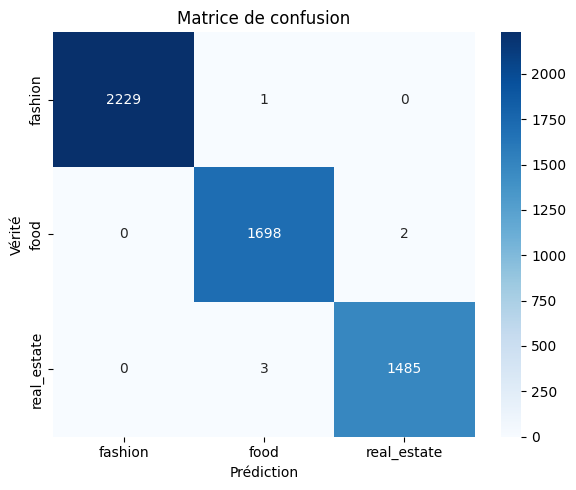

📊 Rapport de classification:
              precision    recall  f1-score   support

     fashion       1.00      1.00      1.00      2230
        food       1.00      1.00      1.00      1700
 real_estate       1.00      1.00      1.00      1488

    accuracy                           1.00      5418
   macro avg       1.00      1.00      1.00      5418
weighted avg       1.00      1.00      1.00      5418

✅ Accuracy globale: 99.89%


In [ ]:
from safetensors.torch import load_file
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Charger depuis safetensors
model.load_state_dict(load_file("best_vit_model.safetensors"))
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Matrice de confusion ---
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
           xticklabels=test_dataset.classes,
           yticklabels=test_dataset.classes,
           cmap="Blues")
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.tight_layout()
plt.show()

# --- Rapport de classification ---
report = classification_report(all_labels, all_preds,
                               target_names=test_dataset.classes)
print("📊 Rapport de classification:")
print(report)

# --- Calcul de l'accuracy globale ---
accuracy = 100.0 * sum([1 for i in range(len(all_labels))
                       if all_labels[i] == all_preds[i]]) / len(all_labels)
print(f"✅ Accuracy globale: {accuracy:.2f}%")

In [ ]:
import torch
from transformers import ViTForImageClassification
from safetensors.torch import load_file  # <-- IMPORTANT

# 1. Charger le modèle de base
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=3,
    ignore_mismatched_sizes=True
)

# 2. Charger depuis .safetensors
model_path = "best_vit_model.safetensors"
try:
    state_dict = load_file(model_path)  # <-- Utiliser load_file pour .safetensors
    model.load_state_dict(state_dict)
    print("✅ Modèle chargé depuis .safetensors")
except Exception as e:
    print(f"❌ Erreur: {e}")

model.eval()

# Classes
id2label = {0: "fashion", 1: "food", 2: "real_estate"}
print("✔ Modèle prêt !")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Modèle chargé depuis .safetensors
✔ Modèle prêt !


In [ ]:
# === 1. SAUVEGARDER TOUS LES FICHIERS ===
import json
import torch
from transformers import ViTForImageClassification
from safetensors.torch import load_file
import os

print("💾 Sauvegarde des fichiers du modèle...")

# A. Charger le modèle
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=3,
    ignore_mismatched_sizes=True
)

# B. Charger vos poids
model.load_state_dict(load_file("best_vit_model.safetensors"))

# C. Mettre à jour la config
model.config.id2label = {0: "fashion", 1: "food", 2: "real_estate"}
model.config.label2id = {"fashion": 0, "food": 1, "real_estate": 2}

# D. Sauvegarder config.json
model.config.save_pretrained(".")
print("✅ config.json sauvegardé")

# E. Sauvegarder labels.json
labels_data = {
    "id2label": model.config.id2label,
    "label2id": model.config.label2id,
    "classes": list(model.config.label2id.keys()),
    "classes_fr": ["mode", "nourriture", "immobilier"],
    "num_classes": model.config.num_labels,
    "input_size": 224,
    "model_type": "vit-base-patch16-224"
}

with open("labels.json", "w") as f:
    json.dump(labels_data, f, indent=2, ensure_ascii=False)
print("✅ labels.json sauvegardé")

# F. Créer un script d'utilisation
script_content = '''import torch
from transformers import ViTForImageClassification, ViTImageProcessor
from safetensors.torch import load_file
from PIL import Image
import json

def load_domain_classifier(model_dir="."):
    """Charge le classifieur de domaine"""
    # Charger config
    with open(f"{model_dir}/config.json", "r") as f:
        config = json.load(f)

    # Charger labels
    with open(f"{model_dir}/labels.json", "r") as f:
        labels = json.load(f)

    # Créer modèle
    model = ViTForImageClassification.from_pretrained(
        "google/vit-base-patch16-224-in21k",
        num_labels=config["num_labels"],
        ignore_mismatched_sizes=True
    )

    # Charger poids
    model.load_state_dict(load_file(f"{model_dir}/best_vit_model.safetensors"))
    model.eval()

    # Processor
    processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

    return model, processor, labels

# Exemple d'utilisation
if __name__ == "__main__":
    model, processor, labels = load_domain_classifier()

    # Prédire une image
    image = Image.open("test.jpg").convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

    pred_class = probs.argmax().item()
    confidence = probs[0][pred_class].item()

    print(f"Prédiction: {labels['id2label'][str(pred_class)]}")
    print(f"Confiance: {confidence:.1%}")
'''

with open("use_model.py", "w") as f:
    f.write(script_content)
print("✅ use_model.py créé")

# === 2. CRÉER LE ZIP ===
print("\n📦 Création de l'archive...")
import zipfile

files_to_zip = [
    "best_vit_model.safetensors",
    "config.json",
    "labels.json",
    "use_model.py"
]

zip_filename = "domain_classifier_package.zip"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in files_to_zip:
        if os.path.exists(file):
            zipf.write(file)
            print(f"  + {file}")
        else:
            print(f"  ⚠️ {file} (non trouvé)")

print(f"\n✅ Package créé: {zip_filename}")
print(f"📁 Taille: {os.path.getsize(zip_filename):,} octets")

# === 3. TÉLÉCHARGER ===
print("\n📥 Téléchargement...")
from google.colab import files
files.download(zip_filename)

print("\n🎉 Téléchargement terminé!")
print("Sur votre PC, dézippez et utilisez:")
print("python use_model.py")

💾 Sauvegarde des fichiers du modèle...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ config.json sauvegardé
✅ labels.json sauvegardé
✅ use_model.py créé

📦 Création de l'archive...
  + best_vit_model.safetensors
  + config.json
  + labels.json
  + use_model.py

✅ Package créé: domain_classifier_package.zip
📁 Taille: 318,577,001 octets

📥 Téléchargement...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 Téléchargement terminé!
Sur votre PC, dézippez et utilisez:
python use_model.py


In [ ]:
from PIL import Image
import torch
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

def predict_image(img_path):
    img = Image.open(img_path).convert("RGB")

    inputs = processor(images=img, return_tensors="pt")


    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1)

        pred_id = torch.argmax(probs).item()
        pred_label = id2label[pred_id]
        pred_prob = probs[0][pred_id].item()

    print("🖼 Image :", img_path)
    print("📌 Classe prédite :", pred_label)
    print("📊 Probabilité :", round(pred_prob, 4))

    return pred_label, pred_prob

# ---- TEST ----
predict_image("/content/test1.jpg")


🖼 Image : /content/test1.jpg
📌 Classe prédite : food
📊 Probabilité : 0.9998


('food', 0.9997685551643372)